# Data summarization evaluation

1. From the dataset D create train dataset D1 (90%) and test dataset D0 (10%)
2. Train model (M1) on the dataset (D1)

3. Generate a summarization dataset from D1 and M1 using some technique (D2i) with i: 25%, 50%, 75% of data

4. Train a new model (M2i) on D2i. Identify a new set of best hyperparameters
    
5. Compare M1 and M2i
    1. Compare errors of M1 and M2i on the complete dataset D1.
    2. Compare errors M1 and M2i on D1\D2i
    3. Compare errors on the test dataset (D0)
    4. (Compare feature importance vectors for individual data points from M1 and M2i)

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import json
import string

import pandas as pd
import numpy as np
import diversipy

from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from graphviz import Digraph

from utils.misc import *



In [12]:
dataset_name = 'ccpp'
sampling_method = 'random'

In [3]:
D = pd.read_csv('datasets/{}.csv'.format(dataset_name))
D.drop_duplicates(inplace=True)

## 1. From the dataset D create train dataset D1 (90%) and test dataset D0 (10%)

In [4]:
D1, D0 = train_test_split(D, test_size = 0.1)

## 2. Train model (M1) on the dataset (D1)

In [5]:
job1 = train(dataset_name, D1)

session: job_vpvjv	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb


In [6]:
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:08 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplqu_tm_n --config /tmp/tmpt3n3cor2 --output /tmp/tmplqs0kvld --persist /tmp/tmpq5yo8syb 2021-03-05 14:08:18,239730 UTC [587] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:08:18,239804 UTC [587] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:08:18,239823 UTC [587] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:08:18,241453 UTC [587] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:08:18,248997 UTC [587] DEBUG CDataFrameAnalyzer.cc@104 Received 8574 rows 2021-03-05 14:09:24,175228 UTC [587] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:09:30,713115 UTC [587] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":27035131} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":12106038} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":71440} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":273} ] 2021-03-05 14:09:30,713173 UTC [587] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:09 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":447.4771423339844 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.3771362304687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":482.2739562988281 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.3952026367187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8197021484375 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.4415893554687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.3666381835937 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":459.1535034179687 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


True

## 3. Generate a summarization dataset from D1 and M1 using some technique (D2i) with i: 25%, 50%, 75% of data

In [7]:
D2 = {}
for i in [0.25, 0.5, 0.75]:
    D2[i] = summarize(dataset_name=dataset_name, dataset=D1, size=i, model=job1.model, method=sampling_method)

## 4. Train a new model (M2i) on D2i

In [8]:
jobs2 = {}
for fraction,D2i in D2.items():
    job = train(dataset_name, D2i) 
    job.wait_to_complete()
    jobs2[fraction] = job

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpz5b13cx6 --config /tmp/tmpa1osvldi --output /tmp/tmpea37n9ls --persist /tmp/tmpbz1ymf_a (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:10 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpz5b13cx6 --config /tmp/tmpa1osvldi --output /tmp/tmpea37n9ls --persist /tmp/tmpbz1ymf_a 2021-03-05 14:10:30,765787 UTC [14210] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:10:30,765833 UTC [14210] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:10:30,765847 UTC [14210] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:10:30,766250 UTC [14210] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:10:30,772242 UTC [14210] DEBUG CDataFrameAnalyzer.cc@104 Received 6430 rows 2021-03-05 14:11:11,571567 UTC [14210] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:11:16,476417 UTC [14210] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":25708036} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":9462861} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":44528} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:11:16,476464 UTC [14210] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 4…11⚑ 3] 15:11 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":441.6195983886719 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.2249145507812 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.4483947753906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":448.7193908691406 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":466.0024108886719 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8018188476562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":440.9210205078125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":433.9494323730469 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


## 5. Compare M1 and M2i

### A. Compare errors of M1 and M2i on the complete dataset D1.

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplbr2rbfg --config /tmp/tmphl4qgjdy --output /tmp/tmprr6saewk --restore /tmp/tmpvue0n1qg (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:50 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmplbr2rbfg --config /tmp/tmphl4qgjdy --output /tmp/tmprr6saewk --restore /tmp/tmpvue0n1qg 2021-03-05 14:50:18,418660 UTC [18483] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:50:18,418713 UTC [18483] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:50:18,418726 UTC [18483] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:50:18,419071 UTC [18483] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:50:18,426036 UTC [18483] DEBUG CDataFrameAnalyzer.cc@104 Received 8574 rows 2021-03-05 14:50:19,578638 UTC [18483] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:50:22,336329 UTC [18483] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:50:24,165498 UTC [18483] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":27035131} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":15419603} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":4408} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:50:24,165537 UTC [18483] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:50 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":448.3068542480469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":434.8985595703125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":482.3186340332031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.7306518554687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.8402709960937 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.5671691894531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.8118591308594 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":459.052734375,""is ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


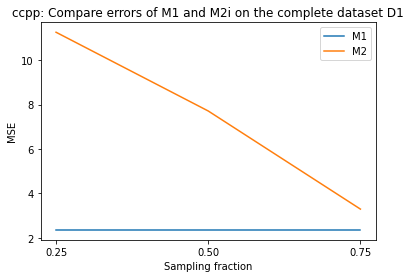

In [15]:
y_true = D1[job1.dependent_variable]

y_M1 = job1.get_predictions()
y_M2 = {}
for i,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1, model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('{} failed'.format(i))
        break
    y_M2[i] = eval_job.get_predictions()
mse1 = [mean_squared_error(y_true, y_M1)] + [mean_squared_error(y_true, y) for y in  y_M2.values()]
plt.plot(y_M2.keys(), [mse1[0]]*3, label='M1')
plt.plot(y_M2.keys(), mse1[1:], label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
_ = plt.title('{}: Compare errors of M1 and M2i on the complete dataset D1'.format(dataset_name))
plt.show()

### B. Compare errors M1 and M2i on D1\D2i

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp5z5us2l9 --config /tmp/tmpi8_mtj4c --output /tmp/tmpettwjamp --restore /tmp/tmpeyia3iin (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:51 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp5z5us2l9 --config /tmp/tmpi8_mtj4c --output /tmp/tmpettwjamp --restore /tmp/tmpeyia3iin 2021-03-05 14:51:13,001744 UTC [28624] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:51:13,001833 UTC [28624] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:51:13,001851 UTC [28624] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:51:13,002286 UTC [28624] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:51:13,004769 UTC [28624] DEBUG CDataFrameAnalyzer.cc@104 Received 2144 rows 2021-03-05 14:51:14,790920 UTC [28624] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:51:15,412630 UTC [28624] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:51:16,709766 UTC [28624] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":22200141} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":11864468} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":2680} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:51:16,709859 UTC [28624] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:51 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":483.6461791992187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":443.3855285644531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":452.6561584472656 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":473.5947875976562 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":478.2857055664062 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":438.8918762207031 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":439.0918884277344 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":477.8826293945312 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


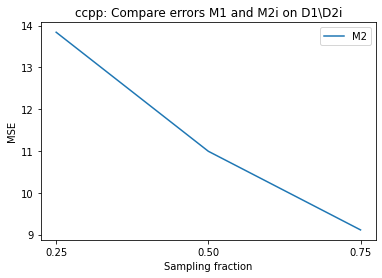

In [16]:
ds1 = set([tuple(line) for line in D1.values])
D1notD2 = {}
for key,D2i in D2.items():
    ds2 = set([tuple(line) for line in D2i.values])
    D1notD2[key] = pd.DataFrame(list(ds1.difference(ds2)), columns=D1.columns)

y_M1 = {}
y_M2 = {}
for key,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1notD2[key], model=job1.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('M1 evaluation for {} failed'.format(key))
        break
    y_M1[key] = eval_job.get_predictions()
    
    eval_job = evaluate(dataset_name=dataset_name, dataset=D1notD2[key], model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('M2 evaluation for {} failed'.format(key))
        break
    y_M2[key] = eval_job.get_predictions()

mse2 =  [mean_squared_error(D1notD2[k][job1.dependent_variable], y) for k, y in  y_M1.items()] + \
        [mean_squared_error(D1notD2[k][job1.dependent_variable], y) for k, y in  y_M2.items()]
        
plt.plot(y_M1.keys(),mse2[:3], label='M1')
plt.plot(y_M2.keys(), mse2[3:], label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
_ = plt.title('{}: Compare errors M1 and M2i on D1\\D2i'.format(dataset_name))
plt.show()

### C. Compare errors on the test dataset (D0)

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmphtp_m6k_ --config /tmp/tmprtr8rzvl --output /tmp/tmpqqftfomi --restore /tmp/tmpbas5601l (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:51 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmphtp_m6k_ --config /tmp/tmprtr8rzvl --output /tmp/tmpqqftfomi --restore /tmp/tmpbas5601l 2021-03-05 14:51:34,376141 UTC [1918] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version based on 8.0.0-SNAPSHOT (Build DEVELOPMENT BUILD by valeriy) Copyright (c) 2021 Elasticsearch BV 2021-03-05 14:51:34,376206 UTC [1918] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 14:51:34,376221 UTC [1918] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 14:51:34,376748 UTC [1918] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 14:51:34,378718 UTC [1918] DEBUG CDataFrameAnalyzer.cc@104 Received 953 rows 2021-03-05 14:51:36,771408 UTC [1918] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 14:51:37,093173 UTC [1918] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 14:51:38,050262 UTC [1918] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":18607436} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":10383392} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":2776} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":250} ] 2021-03-05 14:51:38,050345 UTC [1918] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [summarization-runs|✚ 3…11⚑ 3] 15:51 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":432.7692260742187 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":479.1124877929687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":460.7373352050781 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.3152160644531 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":447.8741149902344 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.9892578125,""i ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.9057922363281 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":461.6562805175781 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Job succeeded


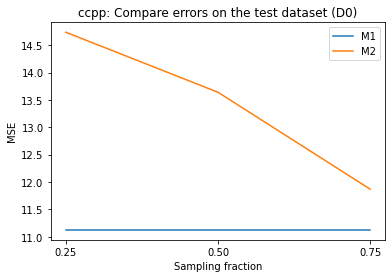

In [17]:
y_true = D0[job1.dependent_variable]

eval_job = evaluate(dataset_name=dataset_name, dataset=D0, model=job1.model)
success = eval_job.wait_to_complete()
y_M1 = eval_job.get_predictions()

y_M2 = {}
for i,job2i in jobs2.items():
    eval_job = evaluate(dataset_name=dataset_name, dataset=D0, model=job2i.model)
    success = eval_job.wait_to_complete()
    if not success:
        print('{} failed'.format(i))
        break
    y_M2[i] = eval_job.get_predictions()

mse3 = [mean_squared_error(y_true, y_M1)] + [mean_squared_error(y_true, y) for y in  y_M2.values()]
    
plt.plot(y_M2.keys(), [mse3[0]]*3, label='M1')
plt.plot(y_M2.keys(), mse3[1:], label='M2')
plt.xticks(list(y_M2.keys()))
plt.xlabel('Sampling fraction')
plt.ylabel('MSE')
plt.legend()
_ = plt.title('{}: Compare errors on the test dataset (D0)'.format(dataset_name))
plt.show()

In [19]:
print("Summary for {} with {}".format(dataset_name, sampling_method))
print(mse1+mse2+mse3)

Summary for ccpp with diversity
[2.355704003581191, 11.255563352348837, 7.710393336128607, 3.2931723475171815, 2.4041659995157665, 2.263543343504205, 2.207259119002872, 13.84152481548258, 10.993396222953178, 9.111978184975689, 11.1233215009081, 14.736026677064404, 13.639607827062951, 11.867977054886834]
